In [2]:
# prepare_data_for_eda.py scrip, without saving out to pkl or csv
import os
import pandas as pd
import logging.config
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler #for matplotlib colors
import seaborn as sns
from sklearn import preprocessing

import importlib
import missingno as msno


LOGGING_CONFIG = os.getenv('LOGGING_CONFIG')
logging.config.fileConfig(LOGGING_CONFIG)
logger = logging.getLogger('prepare_data_for_eda')

In [3]:
DATADIR = os.getenv('DATADIR')
logger.info("using DATADIR {}".format(DATADIR))

2018-05-29 13:32:09,039 - prepare_data_for_eda - INFO - using DATADIR ../DATA


In [4]:
content_performance_bytime = pd.read_csv(os.path.join(DATADIR, 'content_performance_bytime.csv.gz'),  compression='gzip', dtype='object')

In [5]:
content_performance_bytime.columns

Index(['date', 'dimensions_date_id', 'dimensions_item_id', 'pageviews',
       'unique_pageviews', 'feedex_comments', 'is_this_useful_yes',
       'is_this_useful_no', 'number_of_internal_searches', 'exits',
       'entrances', 'bounce_rate', 'avg_time_on_page', 'id', 'content_id',
       'title', 'base_path', 'description', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'locale',
       'publishing_api_payload_version', '_merge', 'date.1',
       'count_survey

In [6]:
content_performance_bytime.head()

,date,dimensions_date_id,dimensions_item_id,pageviews,unique_pageviews,feedex_comments,is_this_useful_yes,is_this_useful_no,number_of_internal_searches,exits,...,repeated_words_count_scaled,spell_count_scaled,readability_score_scaled,equality_count_scaled,passive_count_scaled,simplify_count_scaled,profanities_count_scaled,spelling_grammar,style,errors
0,2018-04-02,2018-04-02,3875931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005876341338783853,0.0,0.0,0.0,0.0,0.0,0.005876341338783853,0.0
1,2018-04-03,2018-04-03,3875931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005876341338783853,0.0,0.0,0.0,0.0,0.0,0.005876341338783853,0.0
2,2018-04-04,2018-04-04,3875931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005876341338783853,0.0,0.0,0.0,0.0,0.0,0.005876341338783853,0.0
3,2018-04-05,2018-04-05,3875931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005876341338783853,0.0,0.0,0.0,0.0,0.0,0.005876341338783853,0.0
4,2018-04-21,2018-04-21,3875931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005876341338783853,0.0,0.0,0.0,0.0,0.0,0.005876341338783853,0.0


In [63]:
content_performance = pd.read_csv(os.path.join(DATADIR, 'content_performance.csv.gz'),  compression='gzip')

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
content_performance = content_performance.replace([np.inf, -np.inf], np.nan).copy()

In [65]:
content_performance.head()

,Unnamed: 0,pageviews,unique_pageviews,feedex_comments,is_this_useful_yes,is_this_useful_no,number_of_internal_searches,exits,entrances,bounce_rate,...,repeated_words_count_scaled,spell_count_scaled,readability_score_scaled,equality_count_scaled,passive_count_scaled,simplify_count_scaled,profanities_count_scaled,spelling_grammar,style,errors
0,426989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000262,0.001203,0.011328,0.001843,0.004409,0.00472,0.003674,0.001872,0.0223,0.004877
1,426991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000262,0.001203,0.011328,0.001843,0.004409,0.00472,0.003674,0.001872,0.0223,0.004877
2,426993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000262,0.001203,0.011328,0.001843,0.004409,0.00472,0.003674,0.001872,0.0223,0.004877
3,426995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000262,0.001203,0.011328,0.001843,0.004409,0.00472,0.003674,0.001872,0.0223,0.004877
4,426992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000262,0.001203,0.011328,0.001843,0.004409,0.00472,0.003674,0.001872,0.0223,0.004877


In [66]:
content_performance.columns

Index(['Unnamed: 0', 'pageviews', 'unique_pageviews', 'feedex_comments',
       'is_this_useful_yes', 'is_this_useful_no',
       'number_of_internal_searches', 'exits', 'entrances', 'bounce_rate',
       'avg_time_on_page', 'id', 'content_id', 'title', 'base_path',
       'description', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'locale',
       'publishing_api_payload_version', '_merge', 'count_survey_responses',
       'response_per_pageview', 'response_

### Counts and check for duplicates

In [10]:
content_performance.duplicated().sum()

0

In [11]:
# content_performance_bytime.duplicated().sum()

In [12]:
# content_performance_bytime = content_performance_bytime.drop_duplicates().copy()

In [67]:
logger.info("content_performance.content_id.nunique()={}".format(content_performance.content_id.nunique()))
logger.info("content_performance.id.nunique()={}".format(content_performance.id.nunique()))
logger.info("content_performance.shape={}".format(content_performance.shape))

2018-05-29 14:05:02,596 - prepare_data_for_eda - INFO - content_performance.content_id.nunique()=428739
2018-05-29 14:05:02,649 - prepare_data_for_eda - INFO - content_performance.id.nunique()=446850
2018-05-29 14:05:02,651 - prepare_data_for_eda - INFO - content_performance.shape=(446850, 64)


In [14]:
logger.info("content_performance_bytime.content_id.nunique()={}".format(content_performance_bytime.content_id.nunique()))
logger.info("content_performance_bytime.id.nunique()={}".format(content_performance_bytime.id.nunique()))
logger.info("content_performance_bytime.shape={}".format(content_performance_bytime.shape))

2018-05-29 13:36:54,017 - prepare_data_for_eda - INFO - content_performance_bytime.content_id.nunique()=428739
2018-05-29 13:36:54,745 - prepare_data_for_eda - INFO - content_performance_bytime.id.nunique()=446850
2018-05-29 13:36:54,746 - prepare_data_for_eda - INFO - content_performance_bytime.shape=(18266364, 67)


### Explore missing

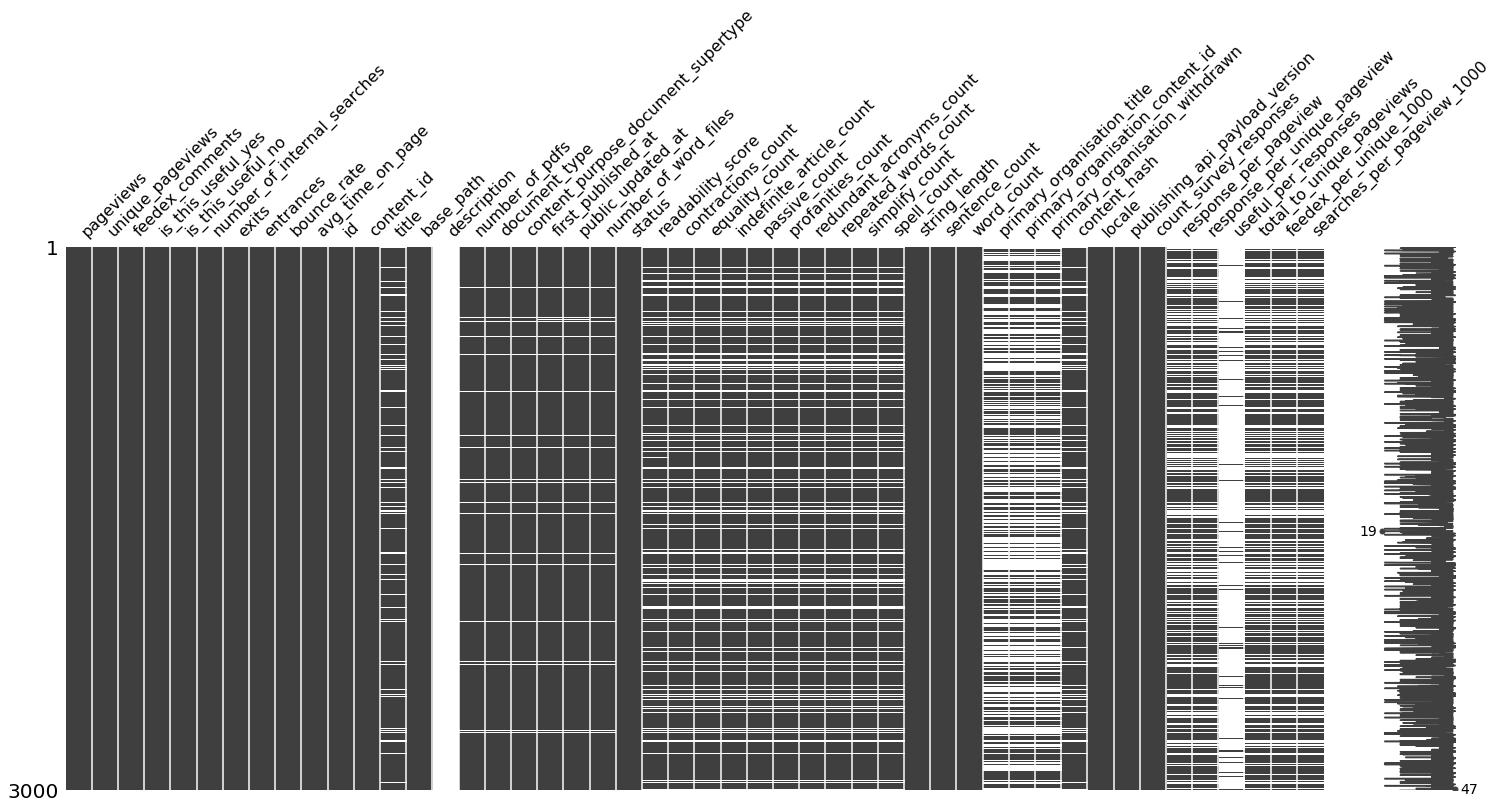

In [68]:
msno.matrix(content_performance[['pageviews',
       'unique_pageviews', 'feedex_comments', 'is_this_useful_yes',
       'is_this_useful_no', 'number_of_internal_searches', 'exits',
       'entrances', 'bounce_rate', 'avg_time_on_page', 'id', 'content_id',
       'title', 'base_path', 'description', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'locale',
       'publishing_api_payload_version', 
       'count_survey_responses', 'response_per_pageview',
       'response_per_unique_pageview', 'useful_per_responses',
       'total_to_unique_pageviews', 'feedex_per_unique_1000',
       'searches_per_pageview_1000']].sample(3000))

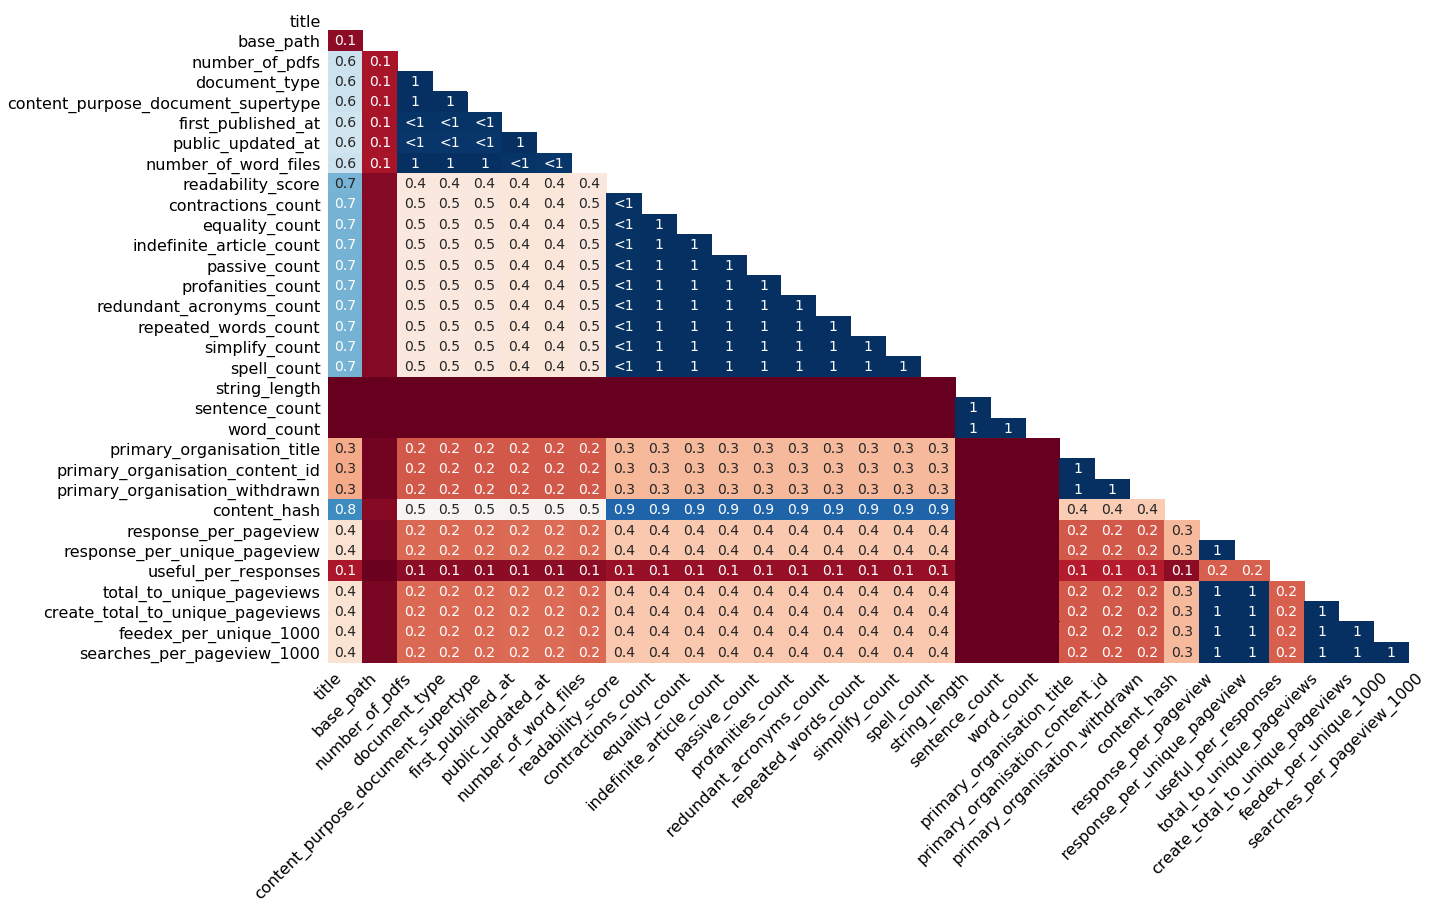

In [69]:
msno.heatmap(content_performance)

In [70]:
content_performance['description'].head()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: description, dtype: float64

In [71]:
content_performance['useful_per_responses'].head()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: useful_per_responses, dtype: float64

In [72]:
content_performance['is_this_useful_yes'].head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_this_useful_yes, dtype: float64

In [73]:
content_performance['count_survey_responses'].head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: count_survey_responses, dtype: float64

In [74]:
#msno.dendrogram(content_performance)

In [75]:
# msno.matrix(content_performance_bytime.sample(1000), freq='D')

### proportion zero

In [76]:
unscaled_content_vars = content_performance[[ 'pageviews', 
                                        'unique_pageviews', 
                                        'feedex_comments',
                                        'is_this_useful_yes', 
                                        'is_this_useful_no',
                                        'number_of_internal_searches','exits', 'entrances', 'bounce_rate', 
                                        'number_of_pdfs',                                 
                                        'number_of_word_files',                                        
                                        'string_length', 
                                        'sentence_count', 
                                        'word_count',
                                        'count_survey_responses',
                                        'response_per_pageview', 
                                        'response_per_unique_pageview',
                                        'useful_per_responses', 
                                        'total_to_unique_pageviews',
                                        'feedex_per_unique_1000', 
                                        'searches_per_pageview_1000',
                                        'contractions_count', 
                                        'indefinite_article_count',
                                        'redundant_acronyms_count', 
                                        'repeated_words_count',
                                        'spell_count', 
                                        'readability_score',
                                        'equality_count', 
                                        'passive_count',
                                        'simplify_count', 
                                        'profanities_count', 
                                        'spelling_grammar',
                                        'style', 
                                        'errors'
                                       ]].replace([np.inf, -np.inf], np.nan)

In [77]:
percent_zero = unscaled_content_vars[unscaled_content_vars == 0].count(axis=0)/len(unscaled_content_vars.index)*100

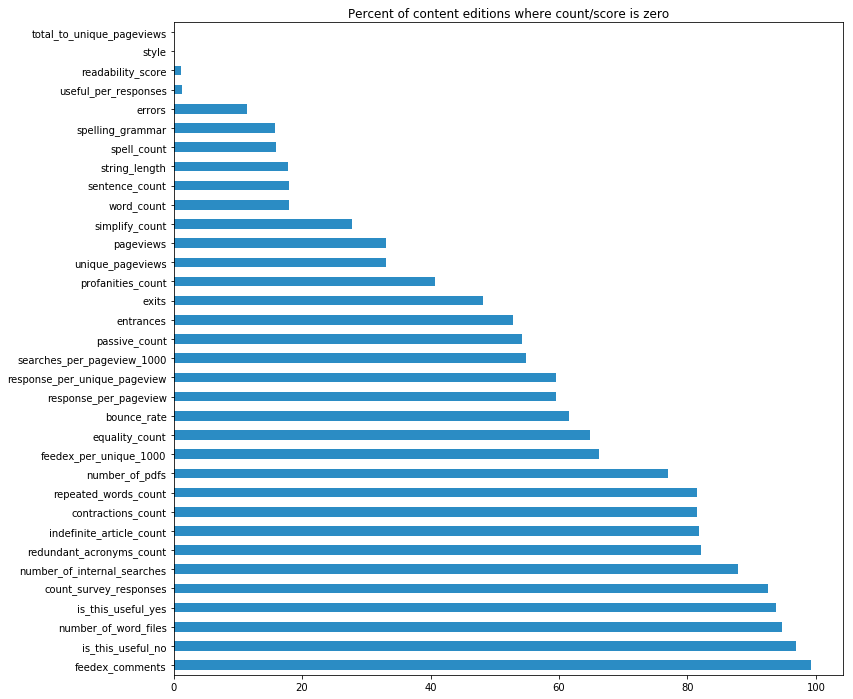

In [78]:
percent_zero.sort_values(ascending=False).plot(kind = 'barh', figsize=(12, 12), color='#2B8CC4', title='Percent of content editions where count/score is zero')

In [79]:
content_performance[['count_survey_responses']].iloc[23]

count_survey_responses    0.0
Name: 23, dtype: float64

In [80]:
content_performance[content_performance['count_survey_responses'].isnull()].shape[0] + \
content_performance[content_performance['count_survey_responses']>0].shape[0] + \
content_performance[content_performance['count_survey_responses']==0].shape[0]

446850

In [81]:
print("{} out of {} ({}%) versions of pages have at least 1 survey response".format(
    content_performance[content_performance['count_survey_responses']>0].shape[0], 
    content_performance.id.nunique(), 
    content_performance[content_performance['count_survey_responses']>0].shape[0]/ 
    content_performance.id.nunique()*100
                                                                                   ))

33579 out of 446850 (7.51460221550856%) versions of pages have at least 1 survey response
